<h2>Welcome to Teradata SQL extension for Jupyter </h2>
<p>
This notebook provides information to help you get started with the Teradata kernel and extensions for JupyterLab. Note that you must have access to a Teradata Advanced SQL Engine system in order to execute SQL statements within your notebook.  
<p><b>This notebook is intended as a Tutorial for the Teradata SQL Kernel. It is not intended for the cells to be run 'as is' as you will have different connections, database objects, and history entries. Please refer to the GettingStartedDemo notebook for a more interactive notebook.</b>
</p> 

[Visit our landing page for more information and downloads](https://teradata.github.io/jupyterextensions/)

<h2>Features</h2>

<h3> The SQL Kernel Provides:</h3>
<ul>
<li>Connection support to add, remove, connect, and list connections</li>
<li>Query engine that uses embedded Teradata SQL driver</li>
<li>SQL aware notebook with SQL content assist and syntax checking</li>
<li>Result set renderer that displays result data in easy to read, scrollable grid</li>
<li>Execution history that stores execution metadata to recall SQL commands at a later time</li>
<li>Visualization using Vega library to display charts, graphs, plots, etc.</li>
<li>Basic data loading that supports loading a CSV data file into a table</li>
<li>Preference settings allow users to modify logging options for the SQL Kernel</li>
<li>Magic commands that provide additional custom kernel options to enhance Teradata user experience</li>
</ul>


<h3> The Navigator Provides:</h3>
<ul>
<li>The ability for users to explore the Advanced SQL Engine catalog, regardless of the language you are using in your notebook (SQL, Python, R).</li>
<li>Hierarchical display of SQL object relational model</li>
<li>Column metadata showing data type and indexes</li>
<li>Row Count, Show DDL, Refresh, and Column Distribution menu options</li>
</ul>


<h3> The Connection Manager:</h3>

<ul>
<li>Connection management to add, remove, edit, copy, list, and test connections</li>
<li>User interface that is independent of the SQL notebook</li>
<li>Connections are shared with the Navigator and SQL notebooks</li>
</ul>

<h4>Refer to the GettingStartedDemo notebook for a live example running Teradata SQL kernel magics.</h4>
<h4>Refer to the DataLoad notebook for an example loading data into a table by running the dataload magic.</h4>
<h4>Refer to the Charting notebook for an example running charts and using custom chart specifications.</h4>

***

<h2>Using the Navigator</h2>
<p>
<ul>
<li>Launched from JupyterLab Launcher or Commands list</li>
<li>Select or add a connection profile (Connection profiles are created using the Connection Manager, a Teradata SQL Notebook, or the Navigator)</li>
<li>Column data type metadata provided</li>
<li>Right click options available (Row Count, Refresh, Show DDL)</li>
    <ul><li>Show DDL displays the request text for the table, with a button to Copy to Clipboard</li></ul>
    <ul><li>Refresh will refresh the catalog display</li></ul>
<li>Foreign Tables are displayed in the Tables list but distinguished by a different icon.</li>
</ul>


***
<h2>Using the Connection Manager</h2>
<p>
<ul>
<li>Accessed from the JupyterLab left sidebar (click on the Teradata icon)</li>
    <li>Provides the list of Teradata Vantage systems, with buttons to <b>test</b>, <b>edit</b>, <b>copy</b>, and <b>remove</b> the connection</li>
    <li>Toolbar with options to <b>add</b> a new connection and <b>refresh</b> the list of connections</li>
<li>Add, edit, and copy will pop-up a form to perform the add, edit, or copy task</li>
    <ul>
    <li>Required fields are bordered in <span style="color:red">red</span> and indicated with an asterisk, '*'</li>
    <li>Invalid field values are turned <span style="color:red">red</span></li>
    <li>Connection Properties can be removed by setting the value to 'Option Not Selected'</li>
    <li>When editing the connection, the connection name can not be modified</li>
   </ul>
</ul>

***
<h2>Setting SQL Kernel Preferences</h2>
<p>
<ul>
    <li>Accessed from the JupyterLab toolbar><b>Settings</b> option. Click to see the dropdown list and choose <b>Advanced Settings Editor</b></li>
    <li>Select <b>Teradata Preferences</b></li>
    <li>The lefthand side of the window shows the default values for the preferences, in a JSON style form. Preferences can be changed by changing the value on the righthand side.</li>
    <li>The values are validated and any errors are displayed at the bottom, righthand side.</li>
    <li>Submit any changes by clicking the disk icon, 'Save User Settings', at the top, righthand toolbar.</li>
    <li>You must restart any Navigator windows or SQL Notebooks for the new preferences to take affect.</li>
</ul>

***
## Teradata SQL Kernel
#### A Teradata SQL Notebook can be opened by selecting the Teradata icon on the launcher page

***
## Magic commands (aka magics)
#### The Teradata SQL Kernel supports a set of magics that can be used to perform a variety of operations
Full list of magics provided with Teradata SQL Kernel can be seen by entering %help.<br><br>
Some magic commands have parameters in the form name=value, name2=value2.<br>
In these cases
1. the parameter names are not case sensitive
2. the values can be quoted with double quotes. Quoting of values is only required if the value contains any of the characters , = " \n

In [1]:
%help

%help **command** - Display detailed help for one magic command (without %).</br>
%help **all** - Display detailed help for all magic commands.</br>
%help **snippets** - Display the list of SQL command Snippets.</br>
%help **rowcount** - Display the current rowcount value.</br>
%help **currentdb** - Display the current database for the user.</br>
%help **hidewarnings** - Display the current hide warnings value.</br>
#### Notation conventions: Items in [] are optional, all others are required.  Parameter names are not case sensitive.</br>
#### Magic Commands:</br>
**%addconnect** - Add a Teradata Vantage database connection specification.</br>**%connect** - Connect to a Vantage system and/or make the connection active.</br>**%disconnect** - Disconnect from a Vantage system.</br>**%rmconnect** - Remove a connection specification.</br>**%chconnect** - Change a connection specification.</br>**%lsconnect** - List the known connections.</br>**%chart** - Display a Vega-Lite visualization of a query result set or an existing Vega or VegaLite chart.</br>**%table** - Display a previous result set as a table.</br>**%meta** - Display metadata of a previous result set.</br>**%dataload** - Load a CSV file into a database table.</br>**%history** - Display a table or the details of previously executed commands.
		If a single history item is specified, the details for that item will be displayed.</br>**%rmhistory** - Remove one or more history items and associated result set(s).</br>**%var** - Define one or more variables for use in SQL statements and magic commands.</br>**%lsvar** - List one or more variables. If no names are provided, list all defined variables.</br>**%rmvar** - Remove one or more defined variables.</br>**%pyinfo** - Display information about the version of Python installed on the Vantage system.</br>**%rinfo** - Display information about the version of R installed on the Vantage system.</br>**%runsto** - Run a Script Table Operator.</br>**%installfile** - Install a file onto the Vantage system.</br>**%rmfile** - Remove a file that has been installed on the Vantage system.</br>**%showfile** - Display the contents of a file that has been installed on the Vantage system.</br>**%loglevel** - Set the logging level for the Teradata SQL kernel.</br>**%lsmagic** - List the supported magic commands.</br>**%quickref** - Display help for magic commands.</br>**%help** - Display help for magic commands.</br>

#### A list of the "magics" without descriptions can be displayed with the %lsmagic command

In [ ]:
%lsmagic

#### Help for a specific command can be displayed by adding the command name (without the %)

In [2]:
%help chart

#### %chart
Display a Vega-Lite visualization of a query result set or an existing Vega or VegaLite chart.

%chart x=&lt;XColumnName&gt;, y=&lt;YColumnName&gt;,</br>
[title=&lt;ChartTitle&gt;,] [id=&lt;ResultSetID&gt;|&lt;HistoryID&gt;,] [part=&lt;PartNum&gt;]</br>
[labelx=&lt;XLabel&gt;,] [labely=&lt;YLabel&gt;,]</br>
[gridx=&lt;ttrue|false&gt;,] [gridy=&lt;true|false&gt;,]</br>
[typex=&lt;q|n|o|t&gt;,] [typey=&lt;q|n|o|t&gt;,]</br>
[mark=&lt;area|bar|circle|line|point|rect|rule|square|text|tick&gt;,]</br>
[color=&lt;CSSColorSpec&gt;,] [height=&lt;ChartHeight&gt;,] [width=&lt;ChartWidth&gt;]</br>
[spec=&lt;ChartSpec&gt;, [data=&lt;ChartData&gt;]]

* **typex** and **typey** values: q=quantitative n=nominal o=ordinal t=temporal
  * (defaults based on column type: numeric types -> quantitative, time times -> temporal, other types -> nominal)
* **&lt;ResultSetID&gt;** is the timestamp/directory name of the result set.
* **&lt;HistoryID&gt;** is the id of the history item (see **%history** command).
* If the **id** is not specified, the most recently accessed result set is displayed.
* The **spec** parameter is used to display an existing chart spec.
* If **spec** is used, only **data**, **id**, and **part** parameters are supported.

***
## Variables
Variables can be defined and used in SQL statements and magic commands
* e.g.

    %var db=mydb, table=mytable

    select * from ${db}.${table}

#### %lsvar to list variables

In [4]:
%help lsvar

#### %lsvar
List one or more variables. If no names are provided, list all defined variables.

%lsvar [&lt;name&gt;][, &lt;name&gt;]...
		
* Variable names are case sensitive (e.g. Name1 and name1 are different variables).

In [5]:
%help rmvar

#### %rmvar
Remove one or more defined variables.

%rmvar &lt;name&gt; [, &lt;name&gt;]...
		
* Variable names are case sensitive (e.g. Name1 and name1 are different variables).


In [6]:
%help var

#### %var
Define one or more variables for use in SQL statements and magic commands.

%var &lt;name&gt;=&lt;value&gt; [, &lt;name&gt;=&lt;value&gt;]...

* Variables can be used in SQL statements with the notation **\$\{name\}**.
	* e.g.
			%var db=mydb, table=mytable
			select * from ${db}.${table}
		will result in the following SQL being run
			select * from mydb.mytable
		and
			%var col1=c1, col2=c2
			select ${col1}, ${col2} from ${db}.${table}
		will result in
			select c1, c2 from mydb.mytable


* Variables can also be used in magic commands with the same notation **\$\{name\}**.
	* e.g.
			%var conName=peach, conUser=user1, conHost=host1
			%connect name=${conname}, user=${conuser}, host=${conhost}
		will result in the following magic command being run
			%connect name=peach, user=user1, host=host1


* Values do not need to be quoted unless they include the characters space, equal, double-quote, comma, or newline.
	* Values can be quoted using double quotes to include these special characters.
	* Single quotes can be included in values but have no special meaning.
	* e.g.
			%var db="mydb . ", table=mytable
			select * from ${db}${table}
		will result in the following SQL being run
			select * from mydb . mytable


* Values are substitued exactly as defined regardless of SQL statement quoting or other context.
	* e.g.
			%var db=mydb, table=mytable, whereval='abc'
			select * from "${db}"."${table}" where f1 = ${whereval}
		will result in (note the single quotes are from the variable value)
			select * from "mydb"."mytable" where f1 = 'abc'


* To include a double-quote character ("), the value should be quoted and the included quote should be doubled.
	* e.g.
			%var str="this string contains ""embedded"" quotes"


* Variable names must begin with an alphabetic character (a-z and A-Z) and can include alphnumeric charaters (a-z, A-Z, and 0-9).
	* e.g. Abc=xyz and a1=abc are OK, but 1=abc, 1a=abc, and a_b=abc are not allowed


* Variable names are case sensitive (e.g. Name1 and name1 are different variables).

* If a variable is already defined, the new value will replace the existing value.

* If a variable is not defined and is used in a SQL or magic command, no substitution will be done.

* Each notebook has a unique set of variables.

* Variables are not persisted.

***
## Managing Teradata Advanced SQL Engine connections

Before accessing a Teradata Advanced SQL Engine, we need to create a connection.<br>
This is a two step process.
1. Add a new connection definition (%addconnect) (if one does not already exist). Connections can also be added using the Connection Manager or the Navigator.
2. Connect (%connect)
***

### List existing connections with the %lsconnect command


In [16]:
%lsconnect

Disconnected: NAME=peach, USER=dbc, HOST=peach1
Disconnected: NAME=teradata-vantage, USER=dbc, HOST=vantage1


### Add a new connection with the %addconnect command
- **NAME** - the user-assigned name of the connection to be created
- **USER**[Optional] - the user name to log in. If the USER is not provided in the %addconnect, you will be prompted for the user during the %connect
- **HOST** - the host name or IP address
- **DATABASE**[Optional] - the default database for the connection

The parameter names are not case sensitive (NAME, name, Name, etc).

In [3]:
%help addconnect

#### %addconnect
Add a Teradata Vantage database connection specification.

%addconnect name=&lt;Connection Name&gt;[, user=&lt;User Name&gt;], host=&lt;Database Server Name or IP Address&gt; [, database="&lt;Default Database&gt;"] [, props="&lt;DB Properties&gt;"] [, dbviews="ViewsV"]
 
If the **user** parameter is not provided with the %addconnect, you must provide the **&lt;User Name&gt;** value with the %connect command.

**database="&lt;Default Database&gt;"** will set the default database for the connection. Executing the DATABASE SQL command statement will take precedence over the default database connection setting.

**props="&lt;DB Properties&gt;"** is used to set certain supported connection properties. The supported properties are:

| Property        | Default | Description
|:----------------|:--------|:----------------------------------------------------------------
| **account**     |         | Specifies the Teradata Database account.
| **cop**         | true    | Specifies whether COP Discovery is performed.
| **coplast**     | false   | Specifies how COP Discovery determines the last COP hostname.
| **dbs_port**    | 1025    | Specifies the Teradata Database port number.
| **encryptdata** | true    | Controls encryption of data to database.  It is not recommended to set this to false.
| **log**         | 0       | Controls driver debug logging.
| **logdata**     |         | Specifies extra data for the chosen logon authentication method.
| **logmech**     | TD2     | Specifies the logon authentication method. Supported values are **TD2**,**LDAP**,**TDNEGO**.
| **sip_support** | true    | Controls whether StatementInfo parcel is used.
| **tmode**       | DEFAULT | Specifies the transaction mode. Possible values are **DEFAULT**, **ANSI**, or **TERA** (must be uppercase).

For more detailed information on the supported properties see
https://github.com/Teradata/jupyterextensions/blob/master/docs/CONNECTIONPARAMETERS.md

* Multiple DB properties can be passed in a comma-separated list, e.g. props="encryptdata=false, tmode=ANSI".
* Use of any unsupported properties will be ignored or errors will be reported as appropriate.

**dbviews="ViewsV"** is used to set the data dictionary query to use the **V** views instead of the **VX** views.
  * By default, the VX views are used, which limits the display of database objects to only those for which 
the connected user has been granted permission.

The connection specification will be saved and can be used in the **%connect**, **%disconnect** and **%rmconnect** commands.

The **Connection Manager** can also be used to add Teradata connections. The Connection Manager can be
accessed from the left-hand, vertical toolbar, by selecting the Manage Teradata Connections icon. The Connection Manager will
display the list of connections, with options to **test**, **edit**, **copy/clone**, or **remove** the connection. If you hover over
a connection, the details for that connection are provided in a pop-up message. Options are also provided in the Connection Manager toolbar to
**refresh** the list of connections and **add** a new connection. </br>

### Change a connection with the %chconnect magic

In [4]:
%help chconnect

#### %chconnect
Change a connection specification.

%chconnect name=&lt;Connection Name&gt; [, user=&lt;New User Name&gt;] [, host=&lt;New Database Server Name or IP Address&gt;] [, database="&lt;Default Database&gt;"] [, props="&lt;New DB Properties&gt;"] [, dbviews="ViewsV"]
		
* Enter the new values for the connection specification parameters, or enter an empty string to remove the parameter altogether.
* The **name** value cannot be changed.
* The **host** value can be changed but cannot be removed, as it is a required parameter for the connection specification.
* **database="&lt;Default Database&gt;"** will change the default database setting stored for the connection. 
 * Executing the DATABASE SQL command statement will take precedence over the default database connection setting.
* If the connection is currently **connected**, you will need to disconnect and re-connect for the changes to take effect.
* **props="&lt;New DB Properties&gt;"** is used to change supported connection properties. The supported properties are:

| Property        | Default | Description
|:----------------|:--------|:----------------------------------------------------------------
| **account**     |         | Specifies the Teradata Database account.
| **cop**         | true    | Specifies whether COP Discovery is performed.
| **coplast**     | false   | Specifies how COP Discovery determines the last COP hostname.
| **dbs_port**    | 1025    | Specifies the Teradata Database port number.
| **encryptdata** | true    | Controls encryption of data to database.  It is not recommended to set this to false.
| **log**         | 0       | Controls driver debug logging.
| **logdata**     |         | Specifies extra data for the chosen logon authentication method.
| **logmech**     | TD2     | Specifies the logon authentication method. Supported values are **TD2**,**LDAP**,**TDNEGO**.
| **sip_support** | true    | Controls whether StatementInfo parcel is used.
| **tmode**       | DEFAULT | Specifies the transaction mode. Possible values are **DEFAULT**, **ANSI**, or **TERA** (must be uppercase).

For more detailed information on the supported properties see
https://github.com/Teradata/jupyterextensions/blob/master/docs/CONNECTIONPARAMETERS.md

* Multiple DB properties can be passed in a comma-separated list, e.g. props="encryptdata=false, tmode=ANSI".
* Use of any unsupported properties will be ignored or errors will be reported as appropriate.

The **Connection Manager** can also be used to edit a Teradata connection. The Connection Manager can be
accessed from the left-hand, vertical toolbar, by selecting the Manage Teradata Connections icon. The Connection Manager will
display the list of connections, with options to **test**, **edit**, **copy/clone**, or **remove** the connection. If you hover over
a connection, the details for that connection are provided in a pop-up message. Options are also provided in the Connection Manager toolbar to
**refresh** the list of connections and **add** a new connection.

### Remove a connection with the %rmconnect magic

In [5]:
%help rmconnect

#### %rmconnect
Remove a connection specification

%rmconnect \<Connection Name\>

### Connect with the %connect command
The connection NAME is required. The USER value can also be specified on the %connect. It will override the USER value specified on the %addconnect. If the USER has not been specified, a prompt will be displayed and the user name can be entered in the text field. The password is also needed if this connection is not yet connected.
A password prompt will be displayed to allow the password to be entered in a hidden text field.
<p>You can also specify a DATABASE value to override the default database for the connection.

In [2]:
%help connect

#### %connect
Connect to a Vantage system and/or make the connection active.

%connect | %%connect [name=]&lt;Connection Name&gt; [, user=&lt;User Name&gt;] [, database=&lt;Default Database&gt;] [, rowcount=&lt;Row Count&gt;] [, hidewarnings=&lt;true|false&gt;] [, props="&lt;DB Properties&gt;"]

* **%connect** will make the named connection the active connection.
* **%%connect** is a cell magic command and can be followed on a new line in the same cell by a SQL statement.
  * The SQL statement must not be on the same line as the magic and it's parameters.
  * This will set the connection used for this SQL statement but will not change the active connection.
* **user** can be specified on the connect. It will override the **user** parameter on the %addconnect if one was specified. 
 * If the **user** has not been specified in the %addconnect, nor %connect, a prompt will be displayed and the **&lt;User Name&gt;** can be entered in the text field.
 * A password is required only if not already connected. A prompt will be displayed and the password can be entered in a hidden text field.
* **database="&lt;Default Database&gt;"** will set the default database for the connection. This will override the default database setting stored for the connection.
 * Executing the DATABASE SQL command statement will take precedence over the default database connection setting.
* **%help currentdb** command will display the current database value.
* **rowcount** limits the number of rows displayed in the result set (e.g. rowcount=100).
  * If **rowcount** is provided with the cell magic, it will only be applied to the result set returned for the cell SQL statement.
* **%help rowcount** command will display the current rowcount value.
* **hidewarnings** hides warnings which may be returned by the database as the results of a SQL statement. Default is false, warnings will be shown.
  * If **hidewarnings** is provided with the cell magic, it will only be applied to the result set returned for the cell SQL statement.
* **%help hidewarnings** command will display the current hidewarnings value.
* **props="&lt;DB Properties&gt;"** is used to override supported connection properties. The supported properties are:

| Property        | Default | Description
|:----------------|:--------|:----------------------------------------------------------------
| **account**     |         | Specifies the Teradata Database account.
| **cop**         | true    | Specifies whether COP Discovery is performed.
| **coplast**     | false   | Specifies how COP Discovery determines the last COP hostname.
| **dbs_port**    | 1025    | Specifies the Teradata Database port number.
| **encryptdata** | true    | Controls encryption of data to database.  It is not recommended to set this to false.
| **log**         | 0       | Controls driver debug logging.
| **logdata**     |         | Specifies extra data for the chosen logon authentication method.
| **logmech**     | TD2     | Specifies the logon authentication method. Supported values are **TD2**,**LDAP**,**TDNEGO**.
| **sip_support** | true    | Controls whether StatementInfo parcel is used.
| **tmode**       | DEFAULT | Specifies the transaction mode. Possible values are **DEFAULT**, **ANSI**, or **TERA** (must be uppercase).

For more detailed information on the supported properties see
https://github.com/Teradata/jupyterextensions/blob/master/docs/CONNECTIONPARAMETERS.md

* Multiple DB properties can be passed in a comma-separated list, e.g. props="encryptdata=false, tmode=ANSI".
* Use of any unsupported properties will be ignored or errors will be reported as appropriate.

The **Connection Manager** can also be used to manage Teradata connections. The Connection Manager can be
accessed from the left-hand, vertical toolbar, by selecting the Manage Teradata Connections icon. The Connection Manager will
display the list of connections, with options to **test**, **edit**, **copy/clone**, or **remove** the connection. If you hover over
a connection, the details for that connection are provided in a pop-up message. Options are also provided in the Connection Manager toolbar to
**refresh** the list of connections and **add** a new connection.

### Select the Teradata Advanced SQL Engine to connect to

In [28]:
%lsconnect

Disconnected: NAME=peach, USER=dbc, HOST=peach1
Disconnected: NAME=teradata-vantage, USER=dbc, HOST=vantage1


In [29]:
%connect teradata-vantage

Password: ···


Success: 'teradata-vantage' connection established and activated for user 'dbc'


#### When a connection is first established, it will prompt you for the password. It will be shown in the %lsconnect output as '*Connected'
The asterisk indicates that this is the active connection (only one connection is **active** at a time, although more that one can be **connected**)

In [30]:
%connect peach

Password: ···


Success: 'peach' connection established and activated for user 'dbc'


In [31]:
%lsconnect

*Connected:   NAME=peach, USER=dbc, HOST=peach1
Connected:    NAME=teradata-vantage, USER=dbc, HOST=vantage1


### Make a connection active with the %connect command
If already connected, the %connect command will make the specified connection the active connection. No password is required in this case.

In [32]:
%connect teradata-vantage

Connected: 'teradata-vantage' connection activated for user 'dbc'


In [33]:
%lsconnect

Connected:    NAME=peach, USER=dbc, HOST=peach1
*Connected:   NAME=teradata-vantage, USER=dbc, HOST=vantage1


### Disconnect with the %disconnect command

In [34]:
%disconnect teradata-vantage

Success: 'teradata-vantage' disconnected

In [35]:
%lsconnect

Connected:    NAME=peach, USER=dbc, HOST=peach1
Disconnected: NAME=teradata-vantage, USER=dbc, HOST=vantage1


### Show Current Database for connection

In [16]:
%help currentdb

Current Database is 'DBC'

***
## Executing SQL

#### To execute SQL, simply enter the SQL in a cell and execute the cell (**SHIFT+ENTER** or the run button in the toolbar)
<p> The active connection will be used to run the SQL. Query results (if any) will be displayed in a table. The results are stored in a CSV file, located in your workspace /Teradata/Resultsets directory.
<p> Hitting the <b>Tab key</b> provides <b>content assist</b>, for example the list of available databases, tables.  This query is just an example, you'll need to specify one that will run on your selected connection.

#### Resultset table right-click context menu
<ul>
    <li>Provides <b>Copy Cells to Clipboard</b> option (or CTRL+C) of selected cell data</li>
    <ul><li>Copies selected cell(s) data to clipboard, as tab separated fields</li>
        <li>Includes column headers </li></ul>
    <li>Provides <b>Show Cell as Text </b>option (or Double click) </li>
    <ul><li>Opens popup dialog with text displayed, including newlines, with its own Copy to Clipboard button.</li></ul>
</ul>

In [6]:
%connect peach

Password: ···


Success: 'peach' connection established and activated for user 'dbc'


In [7]:
select top 25 * from guest.SalesDemo;

,Sales_Center_ID,UNITS,SALES,COST
1,3333,5.0000,32.00,12.80
2,5555,1.0000,7.97,3.89
3,6666,1.0000,18.75,5.20
4,7777,.0000,.00,.00
5,9999,.0000,.00,.00
6,1112,1.0000,8.00,2.65
7,1113,5.0000,39.42,10.68
8,1114,5.0000,35.58,15.84
9,1115,3.0000,.00,.00
10,1116,1.0000,17.18,2.69


### The result of SQL statements that do not return a result set is summarized in the output cell.

In [38]:
update guest.SalesDemo set UNITS = '3' where Sales_Center_ID = '1115';

Success: 1 rows affected

### Errors are also shown in the output cell

In [39]:
select * from NonExistentTable;

ERROR: Unable to run SQL: Unable to run SQL query: Database reported error:3807:Object 'NonExistentTable' does not exist.

### Cancelling a long running query
#### Hitting the 'Interrupt the kernel' toolbar button will cancel the currently executing query.

In [40]:
select * from SSB.LINEORDER_10M_ROWS

ERROR: Request Canceled

### Execute SQL on a specific connection (not necessarily the active connection) with the %%connect cell magic command
#### Follow the %%connect command with SQL in the same cell

In [1]:
%%connect teradata-vantage
select top 25 * from stodemo.housing_train; 

User Name: dbc
Password: ···


Success: 'teradata-vantage' connection established and activated for user 'dbc'


,sn,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,homestyle
1,488,44100,8100,2,1,1,yes,no,no,no,no,1,no,Classic
2,345,88000,4500,3,1,4,yes,no,no,no,yes,0,no,Eclectic
3,406,86000,6900,3,2,1,yes,yes,yes,no,no,0,yes,Eclectic
4,528,106000,6325,3,1,4,yes,no,no,no,yes,1,no,bungalow
5,446,104900,11440,4,1,2,yes,no,yes,no,no,1,yes,bungalow
6,343,80000,10500,2,1,1,yes,no,no,no,no,1,no,Eclectic
7,200,52000,3570,3,1,2,yes,no,yes,no,no,0,no,Eclectic
8,57,25245,2400,3,1,1,no,no,no,no,no,0,no,Classic
9,118,94500,4000,3,2,2,yes,no,yes,no,yes,1,no,Eclectic
10,383,140000,13200,3,1,2,yes,no,yes,no,yes,2,yes,bungalow


#### The %%connect cell magic only specifies the connection to use for the SQL in the same cell; it will not change the active connection

In [88]:
%lsconnect

*Connected:   NAME=peach, USER=dbc, HOST=peach1
Connected:    NAME=teradata-vantage, USER=dbc, HOST=vantage1


***
## History

### List the history of commands executed with the %history command

In [3]:
%help history

#### %history
Display a table or the details of previously executed commands.
		If a single history item is specified, the details for that item will be displayed.

%history [all [,connection=string_in_connection[, command=string_in_command[,status=success|failed|canceled]]]] |</br>
		 [id=HistoryID] | </br>
		 [&lt;Limit&gt;[,&lt;StartID&gt;][,connection=string_in_connection[, command=string_in_command[,status=success|failed|canceled]]]]] |</br>
		 [start=startId[, limit=limit[,connection=string_in_connection[, command=string_in_command[,status=success|failed|canceled]]]]]]

* **all** display all history items.
* **&lt;HistoryID&gt;** the id of the history item to display (will display history details rather than a table).
* **&lt;Limit&gt;** is the number of history items to display. The default limit is 20.
* **&lt;StartID&gt;** is the starting position to list. The default is to display the **&lt;Limit&gt;** most recent items.
* **&lt;connection&gt;** is a string in connection to filter history items.
* **&lt;command&gt;** is a string in command to filter history items.
* **&lt;status&gt;** is status of command to filter history items. Valid values are success, failed and canceled 

### By default the most recent 20 items will be displayed

In [1]:
%history

History ID,Execute Time / <ResultsetID>,Connection Name,Row Count,Elapsed Time,Status,Command
54,<2019.06.21_17.04.50.147_PDT>,peach,89,00:00:00.326,Success,select * from Demo.Areas;
53,<2019.06.21_17.00.05.829_PDT>,peach,89,00:00:00.130,Success,select * from Demo.Areas;
52,<2019.06.21_16.53.27.140_PDT>,peach,178,00:00:00.238,Success,select * from Demo.Areas; select * from Demo.Areas;
51,<2019.06.20_16.53.07.959_PDT>,peach,25,00:00:00.114,Success,select top 25 * from demo.areas;
50,<2019.06.20_16.33.33.057_PDT>,peach,25,00:00:00.114,Success,select top 25 * from demo.areas;
49,<2019.06.20_16.10.27.477_PDT>,peach,89,00:00:00.120,Success,select * from Demo.Areas
48,<2019.06.20_16.10.26.900_PDT>,peach,1,00:00:00.031,Success,select time
47,2019-06-20_16:10:26.279_PDT,peach,0,00:00:00.074,Success,database user1
46,<2019.06.20_16.05.20.373_PDT>,peach,89,00:00:00.325,Success,select * from Demo.Areas
45,<2019.06.20_16.05.19.582_PDT>,peach,1,00:00:00.041,Success,select time


- **History ID** column is the sequential id of each history item
- **Execute Time/ResultSetID** column is the id of the result set produced by the SQL in this history item<br>
  If the SQL produced a result set, the result set id will be enclosed in <><br>
  If no result set was produced (error, or SQL that does not return results) the result set id is not enclosed in <> and represents just a timestamp
- **Connection Name** column is the name of the connection this SQL was executed on
- **Row Count** column is the number of rows returned or loaded
- **Elapsed Time** column is the elapsed time for the command
- **Status** column is the status: Success, Fail, Canceled
- **Command** column is the magic command or SQL that was executed

#### History table right-click context menu
<ul>
    <li>Provides <b>Copy Cells to Clipboard</b> option (or CTRL+C) of selected cell data</li>
    <ul><li>Copies selected cell(s) data to clipboard, as tab separated fields</li></ul>
    <li>Provides <b>Show Cell as Text </b>option (or Double click) </li>
    <ul><li>Opens popup dialog with text displayed, including newlines, with its own Copy to Clipboard button.</li></ul>
</ul>

#### The **Limit** can be specified to change the number of items displayed.

In [2]:
%history 5

History ID,Execute Time / <ResultsetID>,Connection Name,Row Count,Elapsed Time,Status,Command
54,<2019.06.21_17.04.50.147_PDT>,peach,89,00:00:00.326,Success,select * from Demo.Areas;
53,<2019.06.21_17.00.05.829_PDT>,peach,89,00:00:00.130,Success,select * from Demo.Areas;
52,<2019.06.21_16.53.27.140_PDT>,peach,178,00:00:00.238,Success,select * from Demo.Areas; select * from Demo.Areas;
51,<2019.06.20_16.53.07.959_PDT>,peach,25,00:00:00.114,Success,select top 25 * from demo.areas;
50,<2019.06.20_16.33.33.057_PDT>,peach,25,00:00:00.114,Success,select top 25 * from demo.areas;


#### The **StartID** can be specified to change the history id to display from.

In [6]:
%history 7,35

History ID,Execute Time / <ResultsetID>,Connection Name,Row Count,Elapsed Time,Status,Command
41,<2019.06.19_17.00.55.213_PDT>,peach,1,00:00:00.040,Success,select time
40,2019-06-19_17:00:50.606_PDT,peach,0,00:00:00.078,Success,database user1
39,<2019.06.12_17.46.01.706_UTC>,peach,"28,371",00:00:01.515,Success,select * from Demo.Account f inner join Demo.Sales s on s.Sales_id = f.Sales_id where f.sales > 10 and f.sales < 500
38,<2019.06.12_17.44.30.290_UTC>,peach,"50,000",00:00:02.103,Success,select * from Demo.Account
37,<2019.06.12_17.17.51.904_UTC>,peach,"28,371",00:00:01.631,Success,select * from Demo.Account f inner join Demo.Sales s on s.Sales_id = f.Sales_id where f.sales > 10 and f.sales < 500
36,<2019.06.12_17.16.54.145_UTC>,peach,"50,000",00:00:03.242,Success,select * from Demo.Account
35,<2019.06.12_17.16.17.218_UTC>,peach,89,00:00:00.160,Success,select * from Demo.Areas


#### Detailed History Item

In [15]:
%history id=75

History ID:       75
Result Set Path:  /Users/guest/jupyterlabworkspaces/jlab22-workspace/Teradata/Resultsets/2020.08.10_15.36.22.814_PDT
Start Time:       2020-08-10_15:36:22.739_PDT
Connection Name:  peach
Row Count:        3
Elapsed Time:     00:00:00.083
Database Time:    00:00:00.070
Fetch Time:       00:00:00.005

Result:
Success: Executed as a single statement
3 rows / 0 updates: Elapsed time 00:00:00.083

Command:
select * from dbc.dbcinfo


#### Display all history items

In [ ]:
%history all

#### Filter history items by status, connection, command - can be combined

In [ ]:
%history status=succes,command=select

### Remove History Item

In [45]:
%help rmhistory

#### %rmhistory
Remove one or more history items

%rmhistory \<HistoryID\> | [\<StartID\>-\<EndID\>]]

Remove a single history item **\<HistoryID\>** or a range history items **\<StartID\>-\<EndID\>**

* **\<HistoryID\>** is the single history item to remove
* **\<StartID\>** is the low end (inclusive) of the range of history items to remove
* **\<EndID\>** is the high end (inclusive) of the range of history items to remove
* The **%rmhistory** command will prompt for verification before removing history items

In [7]:
%rmhistory 40

Are you sure you want to remove history item with id 40? yes/no yes


Successfully removed 1 history item


#### Rerun the history command and notice that History ID 40 was removed

In [8]:
%history 7,35

History ID,Execute Time / <ResultsetID>,Connection Name,Row Count,Elapsed Time,Status,Command
42,<2019.06.19_17.01.03.611_PDT>,peach,89,00:00:00.193,Success,select * from Demo.Areas
41,<2019.06.19_17.00.55.213_PDT>,peach,1,00:00:00.040,Success,select time
39,<2019.06.12_17.46.01.706_UTC>,peach,"28,371",00:00:01.515,Success,select * from Demo.Account f inner join Demo.Sales s on s.Sales_id = f.Sales_id where f.sales > 10 and f.sales < 500
38,<2019.06.12_17.44.30.290_UTC>,peach,"50,000",00:00:02.103,Success,select * from Demo.Account
37,<2019.06.12_17.17.51.904_UTC>,peach,"28,371",00:00:01.631,Success,select * from Demo.Account f inner join Demo.Sales s on s.Sales_id = f.Sales_id where f.sales > 10 and f.sales < 500
36,<2019.06.12_17.16.54.145_UTC>,peach,"50,000",00:00:03.242,Success,select * from Demo.Account
35,<2019.06.12_17.16.17.218_UTC>,peach,89,00:00:00.160,Success,select * from Demo.Areas


***
## Visualization

### The %chart command is used to produce a graphical visualization of SQL query result sets
#### The %chart command produces and displays a __[Vega-lite](https://vega.github.io/vega-lite/)__ specification using the specified parameters and a result set as input

In [46]:
%help chart

#### %chart
Display a Vega-Lite visualization of a query result set or an existing Vega or VegaLite chart

%chart x=\<XColumnName\>, y=\<YColumnName\>,</br>
[title=\<ChartTitle\>,] [id=\<ResultSetID\>|\<HistoryID\>,] [part=\<PartNum\>]</br>
[labelx=\<XLabel\>,] [labely=\<YLabel\>,]</br>
[gridx=true|false,] [gridy=true|false,]</br>
[typex=q|n|o|t,] [typey=q|n|o|t,]</br>
[mark=area|bar|circle|line|point|rect|rule|square|text|tick,]</br>
[color=\<CSSColorSpec\>,] [height=\<ChartHeight\>,] [width=\<ChartWidth\>]</br>
[spec=\<ChartSpec\>, [data=\<ChartData\>]]

* **typex** and **typey** values: q=quantitative n=nominal o=ordinal t=temporal
  * (defaults based on column type: numeric types -> quantitative, time times -> temporal, other types -> nominal)
* **\<ResultSetID\>** is the timestamp/directory name of the result set
* **\<HistoryID\>** is the id of the history item (see **%history** command)
* If the **id** is not specified, the most recently accessed result set is displayed
* The **spec** parameter is used to display an existing chart spec
* If **spec** is used, only **data**, **id**, and **part** parameters are supported

- <b>x</b> and **y** - represent the x and y axes of the graph. These values must be specified.
- **title** - the title displayed above the chart (optional)
- **id** - the history id or result set id to use as input (most recently accessed if not specified)
- **labelx** - the label of the x axis (default is the x column name)
- **labely** - the label of the y axis (default is the y column name)
- **gridx** - whether to show grid lines for the x axis (default is true)
- **gridy** - whether to show grid lines for the y axis (default is true)
- **mark** - the type of chart to show (bar, line, area, point, rect, square, text, tick) (default is bar)
- **typex** and **typey** - the data type of the x and y axes __[(see the vega-lite specification)](https://vega.github.io/vega-lite/docs/type.html)__
    - q=quantitative - represents quatity values - generally numeric values
    - n=nominal - categorical data values based only on their names or categories. E.g., gender, nationality, music genre.
    - o=ordinal - represents ranked order (1st, 2nd, …) by which the data can be sorted. There is no notion of relative degree of difference between values
    - t=temporal - time and date/time values
    - default types are assigned based on the column data types
        - numeric types -> quantitative
        - time times -> temporal
        - other types -> nominal


### Execute a query, this is just an example

In [ ]:
select top 25 * from alice.kmeanssample;

#### By default %chart uses the most recently accessed result set as input.
#### In this case the result set in the cell above will be used.
Note that all fields in this table are defined as text fields, so **typey=q** is required to cause a column to be interpreted as quantitative (numeric).<br>

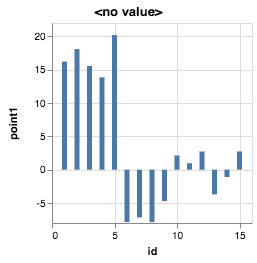

In [41]:
%chart x=id, y=point1, typey=q

#### *** For more charting examples, refer to the ChartingDemo Notebook 

***
### Display previous result set with the %table command
#### Like the %chart command, the %table command can be used to show a previous result set based on **history id** or **result set id**

In [12]:
%history 7,35

History ID,Execute Time / <ResultsetID>,Connection Name,Row Count,Elapsed Time,Status,Command
42,<2019.06.19_17.01.03.611_PDT>,peach,89,00:00:00.193,Success,select * from Demo.Areas
41,<2019.06.19_17.00.55.213_PDT>,peach,1,00:00:00.040,Success,select time
39,<2019.06.12_17.46.01.706_UTC>,peach,"28,371",00:00:01.515,Success,select * from Demo.Account f inner join Demo.Sales s on s.Sales_id = f.Sales_id where f.sales > 10 and f.sales < 500
38,<2019.06.12_17.44.30.290_UTC>,peach,"50,000",00:00:02.103,Success,select * from Demo.Account
37,<2019.06.12_17.17.51.904_UTC>,peach,"28,371",00:00:01.631,Success,select * from Demo.Account f inner join Demo.Sales s on s.Sales_id = f.Sales_id where f.sales > 10 and f.sales < 500
36,<2019.06.12_17.16.54.145_UTC>,peach,"50,000",00:00:03.242,Success,select * from Demo.Account
35,<2019.06.12_17.16.17.218_UTC>,peach,89,00:00:00.160,Success,select * from Demo.Areas


In [1]:
%table 71

,Sales_Center_id,Sales_Center_Name
1,1111,Phoenix
2,2222,Bend
3,3333,Omaha
4,4444,Louisville
5,5555,Bismark
6,6666,Memphis
7,7777,Monroe
8,8888,San Diego
9,9999,Redding
10,1112,South Bend


***
### Sharing Result Sets
#### Teradata result sets can easily be used in another type of notebook (e.g. Python or R)
Result sets are stored under the Teradata/ResultSets directory that is created in the JupterLab working directory (the directory in which 'juptyer lab' command is executed).
Under the Teradata/ResultSets directory is a set of directories named with a timestamp (e.g. 2019.04.17_13.37.30.129_PDT). Each of these directories contains a single result set. Within a result set directory are two files. The file named metadata.json is the result set metadata. It defines the data types of each column in the result set as well as some general information. The other file is the results.csv file. This file contains the result set data as comma separated fields. You can open the results.csv file using JupyterLab's built-in CSV viewer.<br><br>


#### The easiest way to use a Teradata result set is to click the "Copy Result Set Path" button at the top of each result set table.

The "Copy Result Set Path" button will copy the displayed result set path to the clipboard. This value can then be pasted into a cell of another notebook to load the result set into that notebook.<br><br>To load a result set from a table into a Python Pandas dataframe,

1. run a SQL query or use the %table command
1. click the "Copy Result Set Path" button above the displayed table
1. paste the result set path into a Python notebook using the command **pd.read_csv("<ResultSetPath>")**<br>
   for example:<br><br>
`
import pandas as pd
df = pd.read_csv("/root/JupyterLabHome/TeradataResultsets/2018.04.25_13.37.30.129_PDT/results.csv")
df
`

***
# Teradata SQL Syntax coloring
<ul>
<li>Includes Keywords, Functions, UnreservedKeywords, BuiltInFunctions</li>
</ul>

In [ ]:
alter and date timestamp tinyblob begin teradata
--dbc
/*
dbc
*/

SELECT * FROm attribtion (
    
 ON యూనికోడ  AS INPUT  PARTITION BY 用户�?? OrDER BY time_stamp
 ON conversion_event_table AS convOFersion DIMENSION 
 ON optional_event_table AS optional DIMENSION 
 ON आदर�?श  AS model1 DIMENSION
 ON model2_table_fun2 AS model2 DIMENSION
 USING 
 EVENT_COLUMN_NAOOME('ঘটনা')
 TIMESTAMP_COLUMN_NAME('time_stamp') 
 WINDOW('rows:10&seconds:20') 
)ORDER By 用户�??, time_stamp;

select ARRAY_EQ ACCORDING && || + - / * $ % ^ & & 

***
# Teradata Syntax Checking
<ul>
<li>Provides Syntax Checking to validate sql.  Type shift+Tab to run syntax checking on cell contents.</li>
</ul>

***
# Content Assist
<ul>
<li>Provide Data Dictionary objects and Parser results</li>
<li>Colored types are provided for easy distinction</li>
<li>Type Tab key within cell to launch content assist</li>
</ul>

***
## Displaying Python and R Version Information
The <b>%pyinfo</b> and <b>%rinfo</b> commands will display information about the version of Python and R and the addtional modules that are installed on the actively connected <b>Teradata Vantage</b> system. If the module parameter is specified for either of the commands, the list of modules will show only the installed modules whose names start with the parameter value. The commands will only be successful if the actively connected <b>Teradata Vantage</b> system has R or Python installed.

In [42]:
%connect teradata-vantage

Password: ···


Success: 'teradata-vantage' connection established and activated for user 'dbc'


In [ ]:
%rinfo

In [ ]:
%pyinfo

***
## Snippets
**SQL Snippets** provide a template/example for basic SQL commands. 
<p>The snippet is invoked by executing a cell with the SQL keyword, such as ALTER, CREATE, DELETE, or UPDATE, directly followed by a question mark'?'. For example, ALTER?<SHIFT+RETURN>. You can then copy and paste the SQL snippet into the input cell of your Teradata SQL notebook.<p>Run the <b>%help snippets</b> command to see the list of SQL command snippets.

In [ ]:
%help snippets

#### Get the snippets for 'CREATE' SQL commands

In [10]:
MACRO?

CREATE MACRO (INSERT):
   CREATE MACRO {macroName} (
        {parameterName1} {parameterType1},
        {parameterName2} {parameterType2}) AS
        (INSERT INTO {tableName}({columnName1}, {columnName2})
             VALUES(:{parameterName1}, :{parameterName2});
             /* The following select verifies the insert */
             SELECT *
                  FROM {tableName}
                  WHERE {columnName1}=:{parameterName1};
        );

CREATE MACRO (SELECT):
   CREATE MACRO {macroName} AS (
        SELECT {columnName} (TITLE '{columnTitle}1'),
             {columnName2} (TITLE '{columnTitle2}'),
             {columnName3} (TITLE '{columnTitle3}')
             FROM {tableName}
             ORDER BY {orderBy};
   );

EXECUTE MACRO:
   EXEC {mymacro} ({parameter1}, {parameter2}, {parameter3});



***
<h4> Not done yet? Refer to the GettingStartedDemo notebook for a live example using the Teradata SQL notebook.</h4>

Copyright 2021 Teradata. All rights reserved.